# Lecture 6: Classical Tests Based on Normal and $t$-Distributions

## Today's Learning Goals

By the end of this lecture, you should be able to:

1. Use results from the assumption of normality or the Central Limit Theorem (CLT) to perform hypothesis testing.
2. Write a computer script to perform hypothesis testing based on the assumption of normality or the CLT results.
3. Discuss the potential limitations of these methods.
4. Compare and contrast the parts of hypothesis testing that differ between simulation and resampling-based approaches with the assumption of normality or the CLT-based approaches.

## Loading `R` Packages

Let us load the libraries for data wrangling, analysis, and plotting.

In [1]:
library(tidyverse)
options(repr.matrix.max.rows = 6)
options(repr.plot.width = 4, repr.plot.height = 3)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.0      ✔ stringr 1.4.0 
✔ readr   2.1.2      ✔ forcats 0.5.1 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## 1. Hypothesis tests based on normal and $t$-distributions

We follow the same **basic** framework as we did with hypothesis tests using permutation, but with a couple of tweaks.

First off, let us make a quick reminder of hypothesis tests using permutation:

1. Specify our hypotheses with respect to the question we are asking.
2. Then:

```{figure} https://d33wubrfki0l68.cloudfront.net/c13657f5339f170a007f29a840739e0e10d55b32/a275c/images/ht.png
:height: 300px
:name: sim_hypothesis

Image from [*Ismay and Kim (2021)*](https://moderndive.com/9-hypothesis-testing.html).
```

Now, how do we perform a hypothesis testing using normal and $t$-distributions?

1. Specify our hypotheses with respect to the question we are asking.
2. Then

```{figure} img/classical-test-framework.png
:height: 300px
:name: classical_hypothesis

Workflow of a theory-based hypothesis testing.
```

When we use a classical inferential method, the null model is under a specific probability distribution (with its corresponding parameters!). For example:

- a Normal distribution when we are testing for a difference in proportions; 
- or a $t$-distribution when we are testing for a difference of continuous means.


## 2. Example: Hypothesis test for our A/B testing case (comparing two population proportions)

Will changing the design of the website lead to a change in customer engagement (measured by click-through-rate, CTR, for example)?

```{figure} img/ab_test2.png
:height: 400px
:name: ab_webpage_2_b_1

*Image from <a href="https://quod.lib.umich.edu/w/weave/12535642.0001.101?view=text;rgn=main">Young (2014).*
```

### 2.1. Remider on how do we compute a click-through-rate (CTR)?

$$\text{CTR}_i = \frac{\text{Total number of clicks on the button of interest in the $i$th page}}{\text{Total number of impressions on the $i$th page}}$$

This response in the experiment is a proportion. Therefore:

- $p_I \in [0,1]$ is the CTR of the *Interact* (control) treament. 
- $p_S \in [0,1]$ is the CTR of the *Services* (variation) treament. 

### 2.2. Reminder on our hypotheses:

In `lecture4`, **we wanted to infer if the *Services* version had a higher CTR than the *Interact* version**. This is a **one-sided test**:

$H_0$: The CTR for the *Interact* version of the website is the same as the CTR for the *Services* version of the website (i.e., $p_{I} = p_{S}$).

$H_A$: The CTR for the *Services* version of the website is higher than the CTR for the *Interact* version of the website (i.e., $p_{I} < p_{S}$).

Then, $\delta$ can be defined as follows:

$$
H_0: \underbrace{\delta}_{p_{S} - p_{I}} = 0
$$

$$
H_A: \underbrace{\delta}_{p_{S} - p_{I}} > 0
$$

$$z_0= \frac{\hat{p}_1 - \hat{p}_2}{\sqrt{\hat{p} (1 - \hat{p}) \Big(\frac{1}{n_1} + \frac{1}{n_2} \Big)}},$$

 $$\hat{p} = \frac{\sum_{i = 1}^{n_1} X_{S,i} + \sum_{i = 1}^{n_2} X_{I, i}}{n_1 + n_2}$$

### 2.3. Test statistic for two proportions, $Z$-test

Once we have set up our hypotheses, our theory-based CLT test statistic $Z$ will be as follows:

$$Z = \frac{\hat{p}_S - \hat{p}_I}{\sqrt{\hat{p} (1 - \hat{p}) \Big(\frac{1}{n_S} + \frac{1}{n_I} \Big)}} =  \frac{\delta^*}{\sqrt{\hat{p} (1 - \hat{p}) \Big(\frac{1}{n_S} + \frac{1}{n_I} \Big)}},$$

where $n_i$ is the sample size for the $i$th experimental treatment and $\hat{p}$ is the proportions of the clicks ("successes") combined: 

$$\hat{p} = \frac{\sum_{i = 1}^{n_S} X_{S,i} + \sum_{i = 1}^{n_I} X_{I, i}}{n_S + n_I}$$

> **Note:** The $j$th Bernoulli-type variable can take on the following values:
>
>$$
X_{i, j} =
\begin{cases}
1 \; \; \; \; \text{if we obtain a click with the $i$th experimental treatment},\\
0 \; \; \; \; \mbox{otherwise}.
\end{cases}
$$

We can see the following in $Z$:

- The numerator encodes our two sample statistics and is the **effect** size (difference in proportions, $\delta^*$).
- The denominator encodes the standard errors of the two samples (reflecting the sample size and sample variability).
- Thus, if we have a large **effect** (difference in proportions) and/or a small standard error (driven by a large sample size and/or small sample variation) you will get a large $Z$ test statistic.
- The ratio that defines $Z$ is called a **random variable standardization**: adjust the mean to be equal to zero on the numerator, and divide this adjustement by the corresponding standard deviation (the denominator).

### 2.4. Calculating $Z$ for our experimental sample

First, we need to compute $\hat{p}_{S}$ (CTR estimate for treatment `Services`) and $n_{S}$ (visitors assigned to treatment `Services`). Recall that each row in `click_through` represents an **experimental unit** (i.e., webpage visitors who are part of the A/B testing). They were randomized to either treatment `Services` or `Connect` (column `webpage`). Finally, our outcome of interest is column `click_target` (whether the experimental unit clicked or not on the link of interest, i.e., a Bernoulli trial).

In [2]:
click_through <- read_csv("data/click_through.csv")

Rows: 3722 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): webpage
dbl (1): click_target

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
click_through

webpage,click_target
<chr>,<dbl>
Services,0
Interact,0
Services,0
⋮,⋮
Interact,0
Services,0
Services,0


In [4]:
p_S_hat <- click_through %>% 
    filter(webpage == "Services") %>% 
    summarize(click_rate = sum(click_target) / n()) %>% 
    pull()

p_S_hat

[1] 0.04849885

In [5]:
n_S <- click_through %>%
  filter(webpage == "Services") %>%
  nrow()
n_S

[1] 1299

Next, we obtain $\hat{p}_{I}$ (CTR estimate for treatment `Interact`) and $n_{I}$ (visitors assigned to treatment `Interact`):

In [6]:
p_I_hat <- click_through %>% 
  filter(webpage == "Interact") %>% 
  summarize(click_rate = sum(click_target) / n()) %>% 
  pull()
p_I_hat

[1] 0.02847709

In [7]:
n_I <- click_through %>% 
  filter(webpage == "Interact") %>%
  nrow()
n_I

[1] 2423

Next we calculate $\hat{p}$ (the estimated proportions of clicks combined):

$$\hat{p} = \frac{\sum_{i = 1}^{n_1} X_{1,i} + \sum_{i = 1}^{n_2} X_{2, i}}{n_1 + n_2}$$

In [8]:
p_hat <- click_through %>%
  summarise(phat = sum(click_target) / n()) %>%
  pull()
p_hat

[1] 0.0354648

Finally, we can calculate Z, our test statistic:

$$Z = \frac{\hat{p}_S - \hat{p}_I}{\sqrt{\hat{p} (1 - \hat{p}) \Big(\frac{1}{n_S} + \frac{1}{n_I} \Big)}}.$$

> Note: This is the formula for the test statistic of a one-proportion $z$-test

$$z_0 = \frac{\hat{p}-p_0}{\sqrt{\frac{p_0(1-p_0)}{n}}}$$

In [9]:
Z <- (p_S_hat - p_I_hat) / (sqrt(p_hat * (1 - p_hat) * (1 / n_S + 1 / n_I)))
Z

[1] 3.148019

### 2.5. An Important Note on $Z$

**All our hypothesis testing is done under $H_0$.** As previously mentioned, what we did at computing $Z$ was a **standardization** of our observed estimated difference $\delta^* = \hat{p}_S - \hat{p}_I$, leading to:

$$Z \sim \mathcal{N}(\mu = 0, \sigma = 1).$$

Let us now plot the bell-shaped probability density function (PDF) corresponding to this standard normal distribution. As a vertical red line, we indicate the distribution's mean $\mu = 0$.

options(repr.plot.width = 18, repr.plot.height = 6)

Z_norm <- ggplot(data = data.frame(x = c(-4, 4)), aes(x)) +
  stat_function(fun = dnorm, n = 101, args = list(mean = 0, sd = 1)) +
  ylab("") +
  xlab("") +
  theme(text = element_text(size = 20)) +
  geom_vline(xintercept = 0, colour = "red", size = 1.5) +
  labs(x = "Quantile", y = "Density") +
  ggtitle("Null Distribution (Standard Normal)")
Z_norm

### 2.6. Where is our threshold for rejecting $H_0$ under this null distribution with $\alpha = 0.05$?

Recall this is a one-sided test which leads to a single threshold (see dashed blue line).

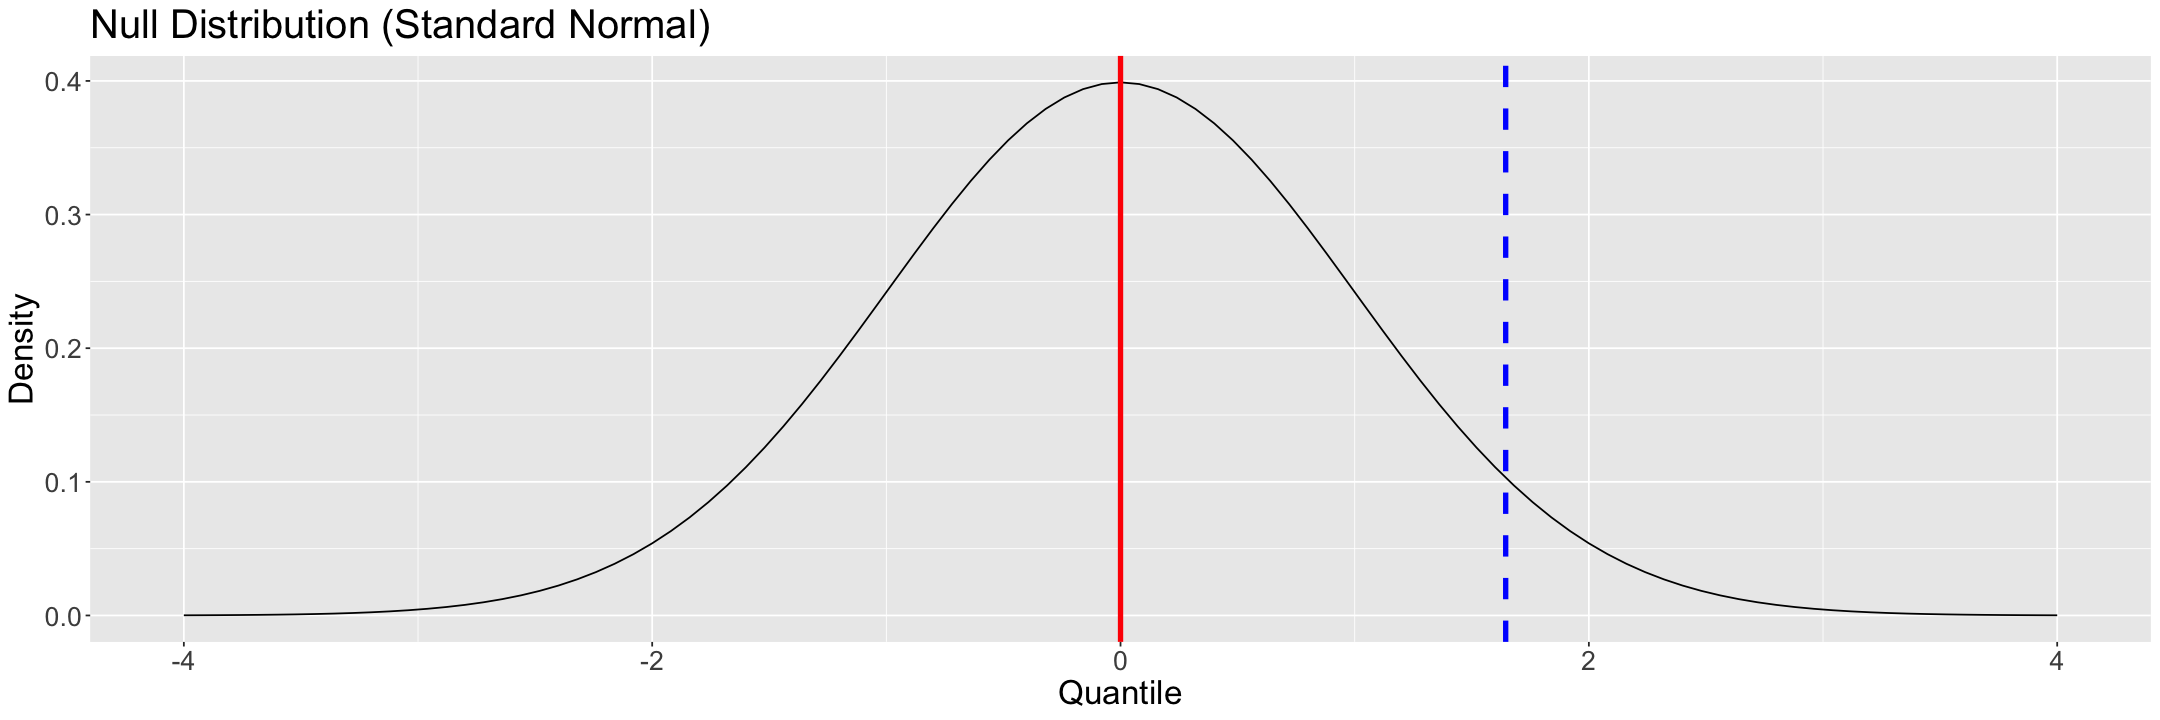

In [11]:
Z_norm <- Z_norm +
  geom_vline(
    xintercept = c(qnorm(0.95)),
    color = "blue", lty = 2, size = 1.5
  )
Z_norm

### 2.7. Where is our sample test statistic $Z$ on this distribution?

We plot it as a green solid line. Note the below code also shows the value of our test statistic $Z$.

[1] 3.148019

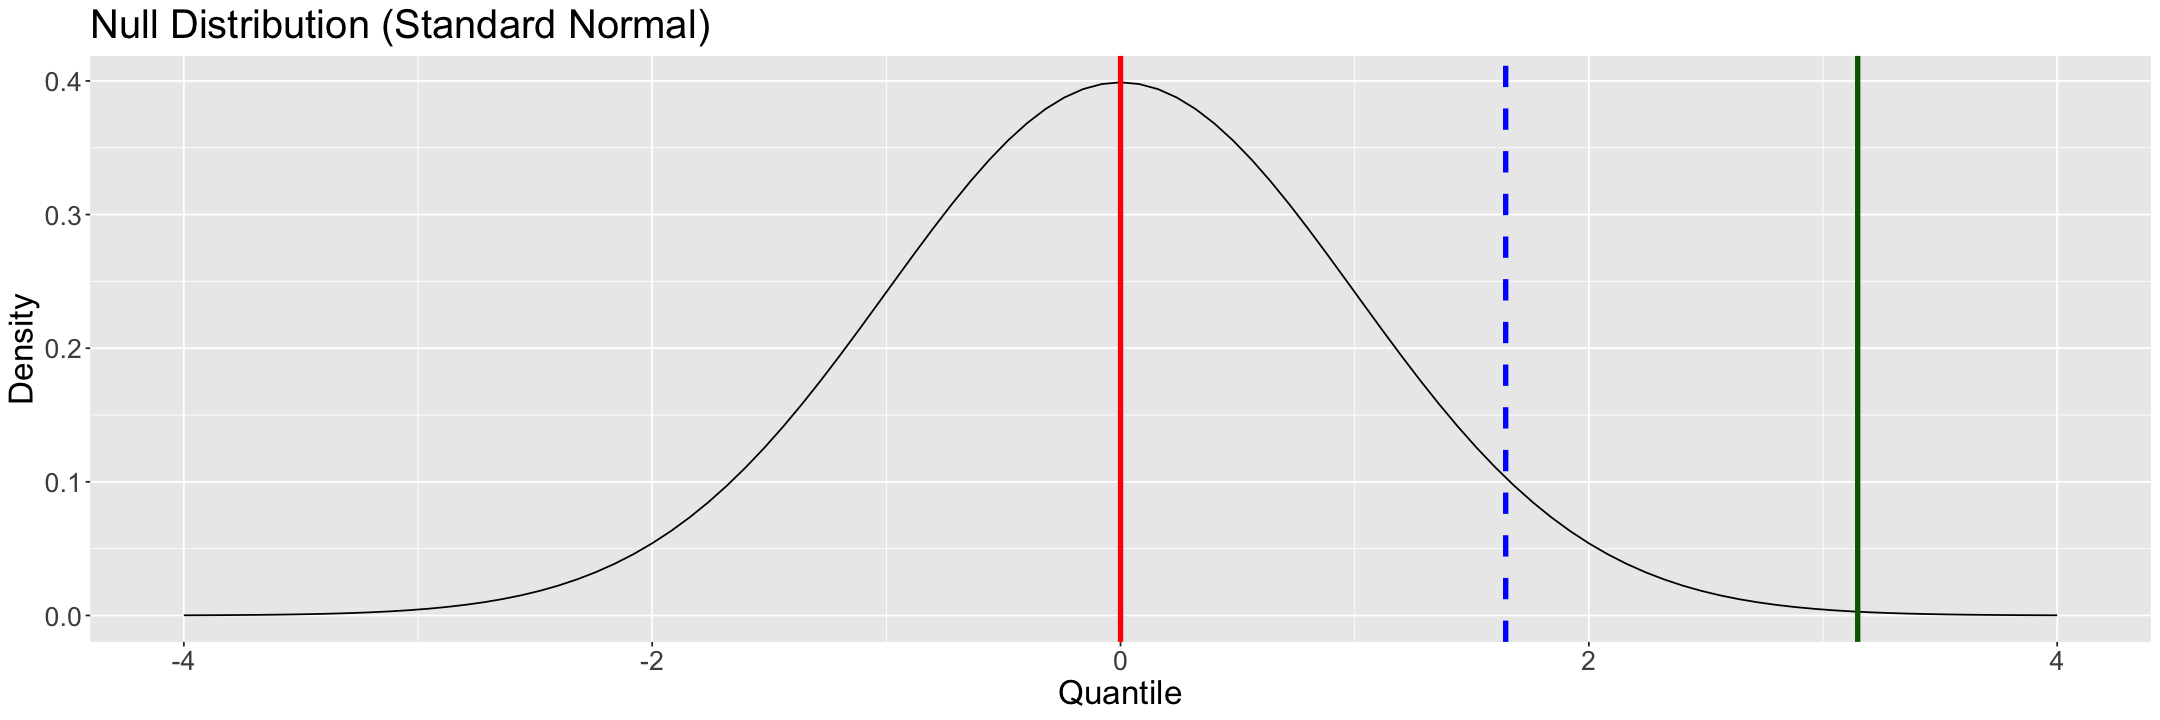

In [12]:
Z_norm <- Z_norm +
    geom_vline(xintercept = Z, color = "darkgreen", size = 1.5)
Z_norm
Z

### 2.8. Calculating the $p$-value

To compute the $p$-value associated to our statistic $Z$, we have to use `pnorm()`.

In [13]:
p_value <- pnorm(Z, lower.tail = FALSE)
p_value

[1] 0.0008219054

### 2.9. But, this is a lot of work!

We can save time by using an automated `R` function called `prop.test()`. Before using this function, we need to generate a proper input for it, such as `click_summary`:

- A column `webpage` indicating the treatment.
- A column `success` indicating the number of subjects who clicked on the link of interest by treatment.
- A column `n` indicating the total number of subjects randomly allocated to treatment.

In [14]:
click_summary <- click_through %>%
  group_by(webpage) %>%
  summarize(
    success = sum(click_target),
    n = n()
  )
click_summary

webpage,success,n
<chr>,<dbl>,<int>
Interact,69,2423
Services,63,1299


Now, function `prop.test()` needs the following arguments using `click_summary`:

- `x`: the column indicating successes in the Bernoulli trials.
- `n`: the column indicating total number of trials by treatment.
- `correct`: whether we need a continuity correction or not.
- `alternative`: whether $H_a$ indicates a `two.sided` (i.e., $\neq$), `greater` or `less`.
- `conf.level`: default is `0.95`.

In [15]:
click_summary

prop.test(x = click_summary$success, n = click_summary$n,
  correct = FALSE, alternative = "less"
)

webpage,success,n
<chr>,<dbl>,<int>
Interact,69,2423
Services,63,1299



	2-sample test for equality of proportions without continuity correction

data:  click_summary$success out of click_summary$n
X-squared = 9.91, df = 1, p-value = 0.0008219
alternative hypothesis: less
95 percent confidence interval:
 -1.000000000 -0.008752051
sample estimates:
    prop 1     prop 2 
0.02847709 0.04849885 


Why `alternative = c("less")` in `prop.test()`? Recall that:

$$H_0: p_{I} = p_{S}$$

versus

$$H_A: p_{I} < p_{S}.$$

```{important} 
The argument `correct = FALSE` implies not having the Yates' continuity correction. This matter is essential when we have less than five successes in our entire sample (as a rule of thumb!).
```

We can use the library `broom`, via `tidy()`, to get a nice and useable output of the statistical summary. This function puts `prop.test()` output as a data frame:

- `estimate1` corresponds to $\hat{p}_I$.
- `estimate2` corresponds to $\hat{p}_S$.
- `statistic` corresponds to $Z^2$.
- `p.value` corresponds to the $p$-value.

In [16]:
library(broom)

tidy.prop.test <- prop.test(click_summary$success, click_summary$n,
  correct = FALSE, alternative = c("less")
) %>%
  tidy()
tidy.prop.test

estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.02847709,0.04849885,9.910023,0.0008219054,1,-1,-0.008752051,2-sample test for equality of proportions without continuity correction,less


### 2.9. Hold on! Our $Z$ statistic was not 9.91...

It turns out that this test $Z$-test comparing two proportions is related to the Chi-squared test of independence (using a $2 \times 2$ contingency table of two experimental treatments with two possible outcomes: success or failure). 

The function `prop.test()` in `R` formally calculates the Chi-squared test. Therefore, it returns the same $p$-value.

**But there is more!**

Theoretically speaking, the square of a standard normal random variable is distributed as a Chi-squared random variable with one degree of freedom:

$$Z \sim \mathcal{N}(\mu = 0, \sigma = 1)$$
$$Z^2 \sim \chi^2_1$$

In [ ]:
tidy.prop.test$statistic

Z^2

In the next lecture, we will discuss the relationship between **Pearson's Chi-squared Test** and the two-sample proportion test in more detail.  

### 2.10. Test Conclusions

From our simulation-based permutation method in `lecture4`, our $p$-value was equal to 0.001 which is pretty close to the $p$-value we computed today!

Therefore, for the two-proportion test, we can conclude the following:

> *Given that our $p$-value is < 0.05 (our defined significance threshold $\alpha$), we have enough statistical evidence to reject the null hypothesis $H_0$ (the CTRs for both website versions are the same) in favour of the alternative hypothesis $H_A$.*

## 3. The $t$-test

As we previously discussed in `lecture5`, **in continuous cases**, one can invoke the CLT when we know the real population standard deviation $\sigma$ (which is unrealistic!).

Recall the CLT-based confidence interval in a continuous case (with a given margin of error, MoE) is 

$$\text{Confidence Interval } = \text{Point Estimate} \pm  \underbrace{\, Z_{1 - \alpha/2} \, \times \, \text{SE}}_{\text{MoE}}.$$

**Standard error** is defined as:

$$\text{SE} = \frac{\hat{\sigma}}{\sqrt{n}}$$

But, we need the estimate $\hat{\sigma}$!

We might say: 

> *Let us just use the sample standard deviation $s$*. 

Again, **we have to be careful about this decision**! It is not advisable to use the Standard Normal distribution (via the quantile $Z_{1 - \alpha/2}$) when the population standard deviation is unknown, especially with a small sample size $n$. So instead, we use the $t$-distribution.

When we use the CLT-based approach, the $\text{SE}$ accuracy becomes unreliable with a not-too-large $n$. Hence, the $t$- distribution is a handy tool in these cases. It is a symmetric distribution **centred at $0$** whose only parameter are the **integer-type** degrees of freedom.

This is another case of a heavy-tailed distribution, i.e., the fewer degrees of freedom we have, the heavier the tails will be, as shown in the below plot.

```{important}
When the degrees of freedom of the $t$-distribution tend to infinity, then it converges to the Standard Normal.
```

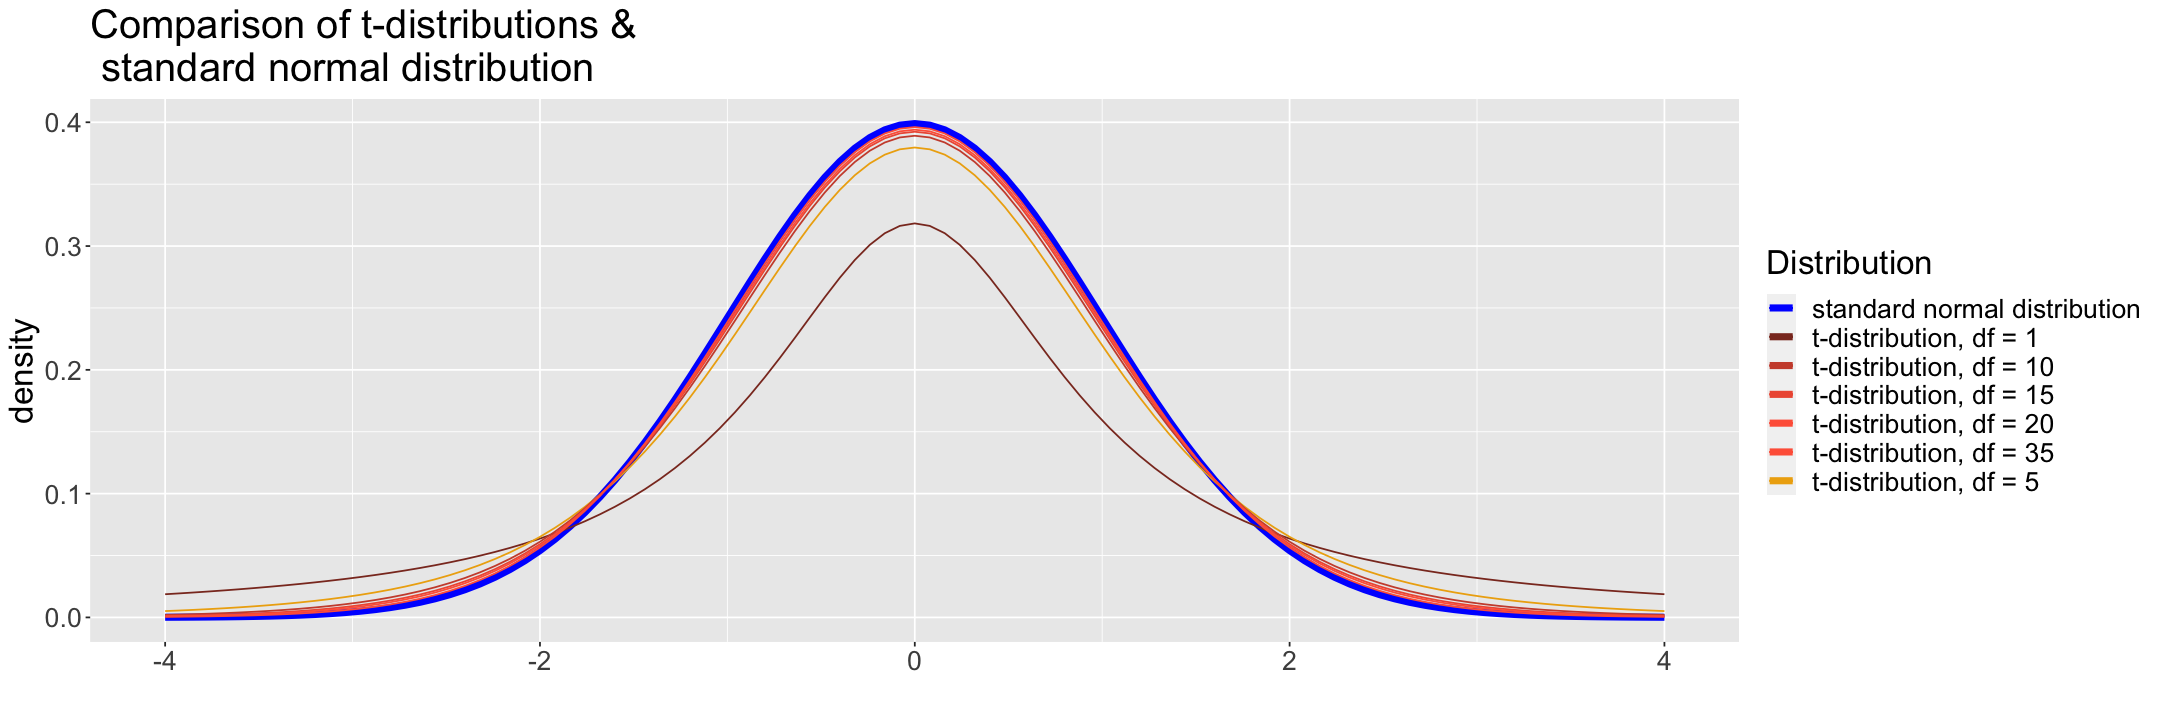

In [21]:
p_dists <- ggplot(data = data.frame(x = c(-4, 4)), aes(x)) +
  stat_function(fun = dnorm, n = 101, args = list(mean = 0, sd = 1), aes(colour = "standard normal distribution"), size = 2) +
  stat_function(fun = dt, n = 101, args = list(df = 1), aes(colour = "t-distribution, df = 1")) +
  stat_function(fun = dt, n = 101, args = list(df = 5), aes(colour = "t-distribution, df = 5")) +
  stat_function(fun = dt, n = 101, args = list(df = 10), aes(colour = "t-distribution, df = 10")) +
  stat_function(fun = dt, n = 101, args = list(df = 15), aes(colour = "t-distribution, df = 15")) +
  stat_function(fun = dt, n = 101, args = list(df = 20), aes(colour = "t-distribution, df = 20")) +
  stat_function(fun = dt, n = 101, args = list(df = 35), aes(colour = "t-distribution, df = 35")) +
  scale_colour_manual("Distribution", values = c(
    "blue", "tomato4", "tomato3",
    "tomato2", "tomato1", "tomato", "darkgoldenrod2"
  )) +
  ylab("density") +
  xlab("") +
  ggtitle("Comparison of t-distributions & \n standard normal distribution") +
  theme(text = element_text(size = 20))
p_dists

The degrees of freedom concept is quite particular in Statistics. Formally, they refer to the number of values allowed to vary in any given analysis.

Suppose you have a data set composed of 5 numbers. You would want your **average to be equal to a fixed value**, then only 4 out of these 5 numbers will be allowed to vary freely, whereas we will fix the fifth one so the final average will be equal to the **desired fixed value**. In this case, you have $5 - 1 = 4$ degrees of freedom.

In [1]:
desired_average <- 40
my_four_numbers <- c(22, 43, 41, 50)
fixed_fifth_number <- (desired_average * 5) - sum(my_four_numbers)
fixed_fifth_number

[1] 44

In [23]:
mean(c(my_four_numbers, fixed_fifth_number))

[1] 40

### 3.1. One-sample $t$-test

This $t$-test involves a single sample with which we would like to make inference on a continuous population mean $\mu$ via the sample mean $\bar{X}$ with standard deviation $S$ and size $n$. It assumes a symmetrical bell-shaped distribution (*yes, we might say Normal this time*). Therefore, using a hypothesized value $\mu_0$ for $\mu$, the null hypothesis $H_0$ is the following:

$$H_0: \mu = \mu_0$$

Versus **either one** of the following three alternative hypothesis:

$$H_a: \mu \neq \mu_0 \qquad \text{(two-sided)}$$
$$H_a: \mu < \mu_0 \qquad \text{(one-sided)}$$
$$H_a: \mu > \mu_0 \qquad \text{(one-sided)}$$

The test statistic is the following:

$$T_0 = \frac{\bar{X} - \mu_0}{\frac{S}{\sqrt{n}}}.$$

Under the **null hypothesis**, $T_0$ has a $t$-distribution with $n - 1$ degrees of freedom.

**Given an observed test statistic $t$**, the rejection regions for $H_0$ are the following depending on our alternative hypothesis (threshold corresponding to the $t$-distributed quantile with $n - 1$ degrees of freedom, and associated with the significance level $\alpha$):

$$H_a: \mu \neq \mu_0 \qquad t \geq t_{n - 1, 1 - \alpha / 2} \quad \text{or} \quad t \leq -t_{n - 1, 1 - \alpha / 2} \qquad \text{two tails}$$

$$H_a: \mu > \mu_0 \qquad t \geq t_{n - 1, 1 - \alpha} \qquad \text{upper tail}$$

$$H_a: \mu < \mu_0 \qquad t \leq -t_{n - 1, 1 - \alpha} \qquad \text{lower tail}$$

Or, equivalently, we reject $H_0$ if $p\text{-value} < \alpha$.

We can use the base `R` function `t.test()` for this purpose with the following arguments:

- `x`: a **numeric vector** with your sampled values.
- `alternative`: whether $H_a$ indicates a `two.sided` (i.e., $\neq$), `greater` or `less`.
- `mu`: your hypothesized value $\mu_0$.
- `conf.level`: default is `0.95`.

Note the function's output can also be put in a nicer `tidy()` format.

### 3.2. Two-sample $t$-test

This $t$-test is meant to hypothesize on **the difference between the means of two independent populations**. The null distribution assumes a symmetrical bell-shaped distribution (*yes, we might say Normal again*).

Let $\mu_A$ be the mean of **population A**, whereas $\mu_B$ is the mean of **population B**. Moreover, let

$$\delta = \mu_A - \mu_B$$

Therefore, using a hypothesized difference value $\delta_0$ for $\delta$, the null hypothesis $H_0$ is the following:

$$H_0: \delta = \delta_0$$

**The basic two-sample $t$-test assumes both population variances are equal, i.e., the same $\sigma^2$ for both.** Thus, the test statistic is the following:

$$T_0 = \frac{(\bar{X}_A - \bar{X}_B) - \delta_0}{S_p \sqrt{\frac{1}{n_A} + \frac{1}{n_B}}},$$

where $\bar{X}_A$ and $\bar{X}_B$ are the sample means, $n_A$ and $n_B$ are the sizes per sample, and

$$S_p = \sqrt{\frac{(n_A - 1)S_A^2 + (n_B - 1)S_B^2}{n_A + n_B - 2}}$$

with sample variances $S_A^2$ and $S_B^2$.

Under the **null hypothesis** and **assuming equal population variances**, $T$ has a $t$-distribution with the following degrees of freedom:

$$\nu = n_A + n_B - 2.$$

Now, a more complex two-sample $t$-test involves **assuming unequal population variances** (i.e., $\sigma^2_A \neq \sigma^2_B$). In this case, the test statistic is the following:

$$T = \frac{(\bar{X}_A - \bar{X}_B) - \delta_0}{\sqrt{\frac{S_A^2}{n_A} + \frac{S_B^2}{n_B}}}.$$

Under the **null hypothesis** and **assuming unequal population variances**, $T$ has a $t$-distribution with the following degrees of freedom:

$$\nu = \frac{\left( \frac{S_A^2}{n_A} + \frac{S_B^2}{n_B} \right)^2}{\frac{\left( \frac{S_A^2}{n_A} \right)^2}{n_A - 1} + \frac{\left( \frac{S_B^2}{n_B} \right)^2}{n_B - 1}}.$$

> Although there are more rigorous tests to assess the equal variance  assumption (e.g., Levene's test), a good rule of thumb is to see whether  the ratio of the larger sample standard deviation over the smaller sample standard deviation is less than 2 (i.e., $s_{max}/s_{min}<2$).

Now, **regardless of the variance assumption**, $H_0$ will be tested versus **either one** of the following three alternative hypothesis:

$$H_a: \delta \neq \delta_0 \qquad \text{(two-sided)}$$
$$H_a: \delta < \delta_0 \qquad \text{(one-sided)}$$
$$H_a: \delta > \delta_0 \qquad \text{(one-sided)}$$

Again, **regardless of the variance assumption and given an observed test statistic $t$**, the rejection regions for $H_0$ are the following depending on our alternative hypothesis (threshold corresponding to the $t$-distributed quantile with $\nu$ degrees of freedom, and associated with the significance level $\alpha$):

$$H_a: \delta \neq \delta_0 \qquad t \geq t_{\nu, 1 - \alpha / 2} \quad \text{or} \quad t \leq -t_{\nu, 1 - \alpha / 2} \qquad \text{two tails}$$

$$H_a: \delta > \delta_0 \qquad t \geq t_{\nu, 1 - \alpha} \qquad \text{upper tail}$$

$$H_a: \delta < \delta_0 \qquad t \leq - t_{\nu, 1 - \alpha} \qquad \text{lower tail}$$

Or, equivalently, we reject $H_0$ if $p\text{-value} < \alpha$.

```{important}
Degrees of freedom $\nu$ will be computed according to our variance assumption.
```

We can use the base `R` function `t.test()` for this purpose with the following arguments:

- `formula`: is an expression in the form `variable_of_interest ~ population_label`. Note that `variable_of_interest` and `population_label` are coming from your sample `data` set.
- `data`: your sample data set.
- `mu`: your hypothesized value $\delta_0$.
- `alternative`: whether $H_a$ indicates a `two.sided` (i.e., $\neq$), `greater` or `less`.
- `conf.level`: default is `0.95`.
- `var.equal`: It will be `TRUE` when the test assumes equal population variances and `FALSE` when we assume unequal population variances.

Note the function's output can also be put in a nicer `tidy()` format.

## 4. What has changed now that we are using a theory-based approach?

- We are using mathematically defined distributions instead of simulating them.
- For confidence intervals, we use mathematical shortcuts to calculate the plausible range instead of just reading the values off the bootstrap distribution.
- For hypothesis tests, we are encoding the sample size $n$ in the test statistic within the standard error instead of building an empirical distribution of test statistics under the null hypothesis model.

## 5. What is next?

- Tests for multiple groups

## 6. Acknowledgements

- [Open Intro Statistics](https://www.openintro.org/book/os/) by David Diez, Mine Cetinkaya-Rundel and Christopher D Barr
- [Data Science in a box](https://github.com/rstudio-education/datascience-box) by Mine Cetinkaya-Rundel
- [Inference in 3 hours](https://github.com/AllenDowney/CompStats) by Allan Downey
- [Modern Dive: An Introduction to Statistical and Data Sciences via R](https://moderndive.com/index.html) by Chester Ismay and Albert Y. Kim